In [2]:
## Load data and run statistical analysis (2x2 rm-ANOVA)


from os import listdir # function to create a list of all elements in a dir
from os.path import join, isfile
import numpy as np
import pandas as pd # a Python package used for basic statistics and data sorting
import matplotlib.pyplot as plt
import seaborn as sns
from pymatreader import read_mat
import pingouin as pg

indir = "Data/"
table_name = "Results.csv"


## Choose your Speech Feature/ Behavioral Data 
# possible Inputs: Envelope, Phoneme Onset, Word Onset, f0, f1, f2, f3, f2_3, Comprehension Performance, Difficulty Rating  
var_name = "Envelope"



# Do rm ANOVA with factors Mask and Distractor
table = pd.read_csv(join(indir,table_name))
pg.rm_anova(table, var_name, ["Mask", "Distractor"], "SubID")


Source        SS  ddof1  ddof2        MS           F  \
0               Mask  0.032763      1     28  0.032763   24.423594   
1         Distractor  0.599404      1     28  0.599404  161.090437   
2  Mask * Distractor  0.000104      1     28  0.000104    0.252523   

          p-unc     p-GG-corr       np2  eps  
0  3.249770e-05  3.249770e-05  0.465889  1.0  
1  3.923190e-13  3.923190e-13  0.851923  1.0  
2  6.192335e-01  6.192335e-01  0.008938  1.0

/home/clh/Schreibtisch/facemasktracking/venv/lib/python3.9/site-packages/seaborn/categorical.py:1733: UserWarning: You passed a edgecolor/edgecolors ([(0.24958205, 0.28556371, 0.55701246), (0.220668, 0.66594665, 0.67485792)]) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,


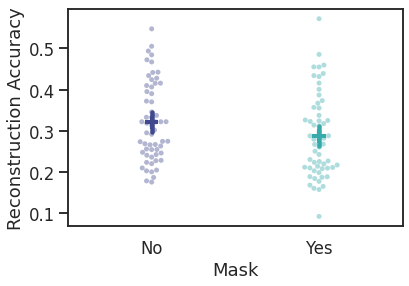

In [3]:
## Plot Main Effect 'Mask' for Feature/Behavioural Data

sns.set_style('ticks')
sns.set_context("talk", font_scale=1, rc={"lines.linewidth": 2.5, 'xtick.major.width': 0})
gM = sns.pointplot(x="Mask", y=var_name, data=table, palette="mako", markers="+", scale=1.2, ci=95)
gM = sns.swarmplot(x="Mask", y=var_name, data=table, palette="mako", alpha=0.4, zorder=1)
gM.set_ylabel("Reconstruction Accuracy");


/home/clh/Schreibtisch/facemasktracking/venv/lib/python3.9/site-packages/seaborn/categorical.py:1733: UserWarning: You passed a edgecolor/edgecolors ([(0.24958205, 0.28556371, 0.55701246), (0.220668, 0.66594665, 0.67485792)]) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,


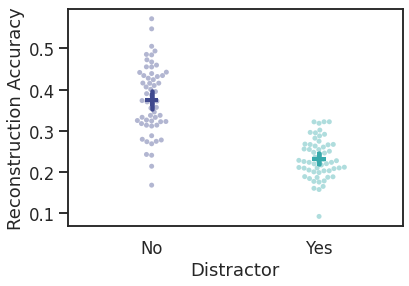

In [4]:
## Plot Main Effect 'Distractor' for Feature/Behavioural Data

sns.set_style('ticks')
sns.set_context("talk", font_scale=1, rc={"lines.linewidth": 2.5, 'xtick.major.width': 0})
gD = sns.pointplot(x="Distractor", y=var_name, data=table, palette="mako", markers="+", scale=1.2, ci=95)
gD = sns.swarmplot(x="Distractor", y=var_name, data=table, palette="mako", alpha=0.4, zorder=1)
gD.set_ylabel("Reconstruction Accuracy");


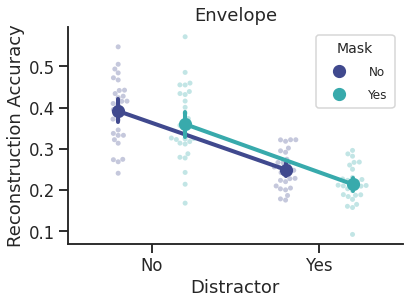

In [5]:
## Plot Interaction Mask*Distractor

sns.set_context('talk')
gI = sns.pointplot(x="Distractor", y=var_name, hue="Mask", data=table, palette="mako", dodge = .4)
gI = sns.swarmplot(x="Distractor", y=var_name, hue="Mask", data=table, palette="mako", alpha=0.3, zorder=1, dodge = True)
handles, labels = gI.get_legend_handles_labels()
gI.legend(handles[:2], labels[:2], title = "Mask")
gI.figure.set_size_inches(6, 4, forward=True)
gI.set_xlabel("Distractor")
gI.set_ylabel("Reconstruction Accuracy");
gI.set_title(var_name)




plt.setp(gI.get_legend().get_texts(), fontsize='12')
plt.setp(gI.get_legend().get_title(), fontsize='14')# for legend text



sns.despine()


[None, None, None, None]

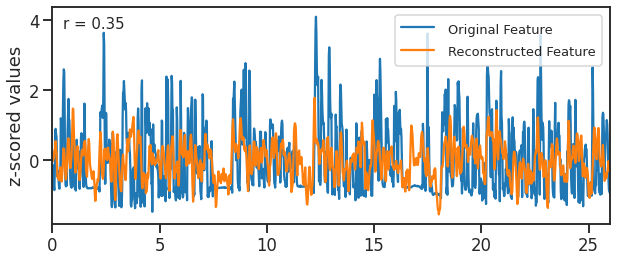

In [6]:
## Plot reconstructed and original envelope together


from os import listdir # function to create a list of all elements in a dir
from os.path import join, isfile
import numpy as np
import pandas as pd # a Python package used for basic statistics and data sorting
import matplotlib.pyplot as plt
import seaborn as sns
from pymatreader import read_mat
import pingouin as pg
indir = "Data/"
table_name = "Plot_Recon_Envelope.csv"



table_reconstruction = pd.read_csv(join(indir,table_name))
sns.set_context('talk')   
rec = sns.lineplot(x="Time", y="Input", data=table_reconstruction,  palette="mako")
rec = sns.lineplot(x="Time", y ="Reconstruction", data=table_reconstruction, palette="mako")
rec.figure.set_size_inches(10, 4, forward=True)

rec.legend(handles=rec.lines, labels=["Original Feature","Reconstructed Feature"])
rec.set(xlabel=None, ylabel='z-scored values')

corr = pg.corr(table_reconstruction.Input, table_reconstruction.Reconstruction)

rec.annotate("r = {:.2f}".format(corr.r.values[0]),
                xy=(.02, .9), xycoords=rec.transAxes, fontsize = 15 )

rec.axes.set_xlim(xmin = 0,xmax=26)
plt.setp(rec.get_legend().get_texts(), fontsize='13') # for legend text


(-3.0, 4.0)

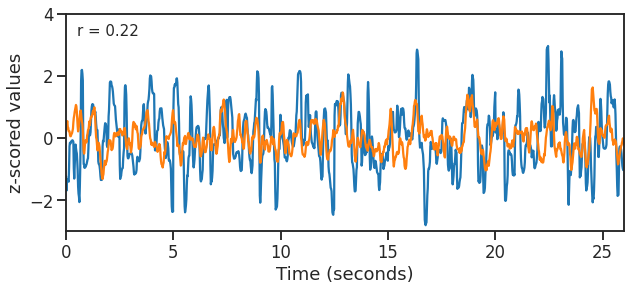

In [7]:
## Plot reconstructed and original F2/3 together


from os import listdir # function to create a list of all elements in a dir
from os.path import join, isfile
import numpy as np
import pandas as pd # a Python package used for basic statistics and data sorting
import matplotlib.pyplot as plt
import seaborn as sns
from pymatreader import read_mat
import pingouin as pg
indir = "Data/"
table_name = "Plot_Recon_f2_3.csv"



table_reconstruction = pd.read_csv(join(indir,table_name))
sns.set_context('talk')     
rec = sns.lineplot(x="Time", y="Input", data=table_reconstruction, palette = 'mako')
rec = sns.lineplot(x="Time", y ="Reconstruction", data=table_reconstruction, palette = 'mako')
rec.figure.set_size_inches(10, 4, forward=True)


rec.set(xlabel='Time (seconds)', ylabel='z-scored values')

corr = pg.corr(table_reconstruction.Input, table_reconstruction.Reconstruction)

rec.annotate("r = {:.2f}".format(corr.r.values[0]),
                xy=(.02, .9), xycoords=rec.transAxes, fontsize = 15 )


rec.axes.set_xlim(xmin = 0,xmax=26)
rec.axes.set_ylim(ymin = -3,ymax=4)


(0.0, 0.55)

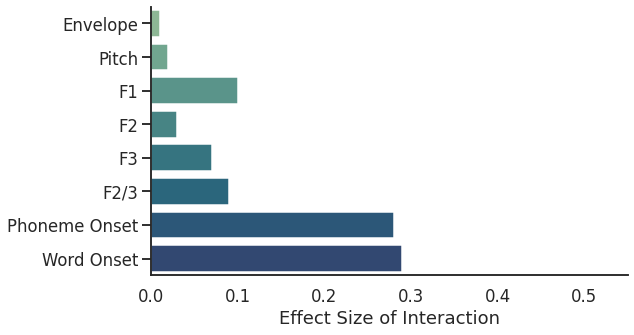

In [8]:
# Plot Effect Size of Interaction Mask*Distractor

effect_size = "Data/Interaction_effect.csv"

table = pd.read_csv(effect_size);
sns.set_context("talk", font_scale=1, rc={"lines.linewidth": 2.5, 'xtick.major.width': 0})
gIE = sns.catplot(y = "Feature", x="Effect Size of Interaction",hue="Feature", kind="bar",
            palette="crest", orient = "h", aspect = 2,
            data=table, dodge = False)
gIE._legend.remove()
gIE.set(ylabel=None)
sns.despine()
plt.xlim(0, 0.55)


(0.0, 0.55)

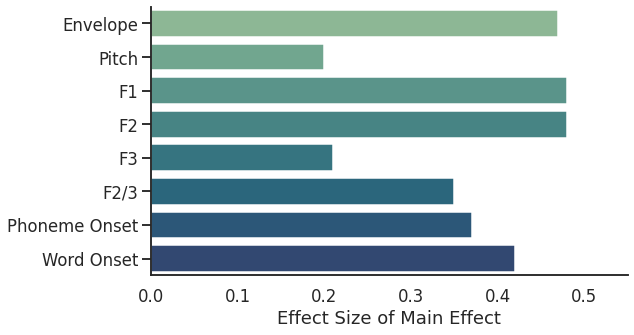

In [9]:
## Plot Effect Size of Main Effect 'Mask'
effect_size = "Data/Main_effect_mask.csv"

table = pd.read_csv(effect_size);
sns.set_context("talk", font_scale=1, rc={"lines.linewidth": 2.5, 'xtick.major.width': 0})
gME = sns.catplot(y = "Feature", x="Effect Size of Main Effect",hue="Feature", kind="bar",
            palette="crest", orient = "h", aspect = 2,
            data=table, dodge = False)
gME._legend.remove()
gME.set(ylabel=None)
sns.despine()
plt.xlim(0, 0.55)


[Text(0.5, 37.44, 'Reconstruction Accuracy')]

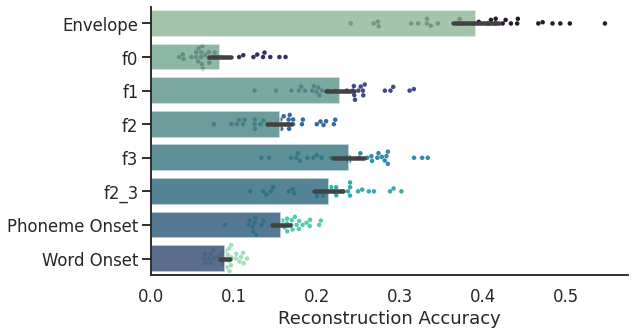

In [10]:
## Average reconstruction accuracy tested on clean speech for each feature


Accuracies = "Data/Clean_audio_reconstruction.csv"
table = pd.read_csv(Accuracies);
sns.set_context("talk", font_scale=1, rc={"lines.linewidth": 2.5, 'xtick.major.width': 0})
gRA = sns.catplot(y = "Features", x="Accuracies",hue="Features", kind="bar",
            palette="crest", orient = "h", aspect = 2,
            data=table, dodge = False, ci = 95, alpha = .8)
gRA._legend.remove()
gRA = sns.swarmplot(x="Accuracies", y="Features", data=table, palette="mako", alpha=1, zorder=1, dodge = True, size = 4.5)
#gRA._legend.remove()
gRA.set(ylabel=None)
sns.despine()
gRA.set(xlabel='Reconstruction Accuracy')


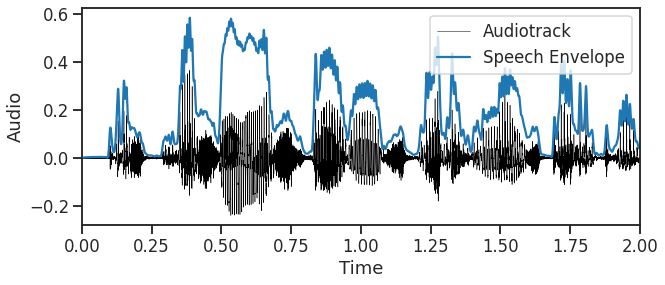

In [11]:
## Plot audio track and envelope together


from os import listdir # function to create a list of all elements in a dir
from os.path import join, isfile
import numpy as np
import pandas as pd # a Python package used for basic statistics and data sorting
import matplotlib.pyplot as plt
import seaborn as sns
from pymatreader import read_mat
import pingouin as pg

envelope_tbl = pd.read_csv("Data/Methods_plot_Envelope.csv")

sns.set_context('talk')     
gEnv = sns.lineplot(x="Time", y="Audio", data=envelope_tbl, color = 'black', linewidth = 0.5)
gEnv = sns.lineplot(x="Time", y ="Envelope", data=envelope_tbl, palette = 'mako')
gEnv.figure.set_size_inches(10, 4, forward=True)
gEnv.axes.set_xlim(xmin = 0,xmax=2)
gEnv.legend(handles=gEnv.lines, labels=["Audiotrack","Speech Envelope"])




(0.0, 2.0)

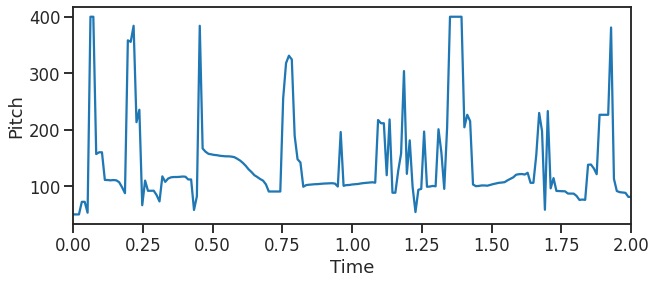

In [12]:
# plot pitch 

from os import listdir # function to create a list of all elements in a dir
from os.path import join, isfile
import numpy as np
import pandas as pd # a Python package used for basic statistics and data sorting
import matplotlib.pyplot as plt
import seaborn as sns
from pymatreader import read_mat
import pingouin as pg

f0_tbl = pd.read_csv("Data/Methods_plot_pitch.csv")

sns.set_context('talk')     
gf0 = sns.lineplot(x="Time", y ="Pitch", data=f0_tbl, palette = 'mako')
gf0.figure.set_size_inches(10, 4, forward=True)
gf0.axes.set_xlim(xmin = 0,xmax=2)

